# Analysis of the Iris Dataset

## Task 1: Load and Explore the Dataset

In this section, we load the Iris dataset and perform initial exploration.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [ ]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first few rows
print("First 5 rows of the dataset:")
iris_df.head()

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Compute basic statistics for numerical columns
print("Basic statistics for numerical columns:")
display(iris_df.describe())

# Group by species and compute mean of numerical columns
print("\nMean values by species:")
species_group = iris_df.groupby('species').mean()
display(species_group)

# Identify patterns and interesting findings
print("\nInteresting findings:")
print("1. Setosa has the smallest flowers with the shortest petals and smallest petal width.")
print("2. Virginica has the largest flowers with the longest petals and largest petal width.")
print("3. Versicolor is intermediate in size between setosa and virginica.")
print("4. Setosa has the widest sepals on average, while versicolor has the narrowest.")

Basic statistics for numerical columns:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Mean values by species:


C:\Users\Einstein\AppData\Local\Temp\ipykernel_6820\3386815223.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  species_group = iris_df.groupby('species').mean()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026



Interesting findings:
1. Setosa has the smallest flowers with the shortest petals and smallest petal width.
2. Virginica has the largest flowers with the longest petals and largest petal width.
3. Versicolor is intermediate in size between setosa and virginica.
4. Setosa has the widest sepals on average, while versicolor has the narrowest.


## Task 3: Data Visualization

We create four different visualizations to understand the data distribution and relationships.

C:\Users\Einstein\AppData\Local\Temp\ipykernel_6820\3961205111.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  species_means = iris_df.groupby('species').mean()


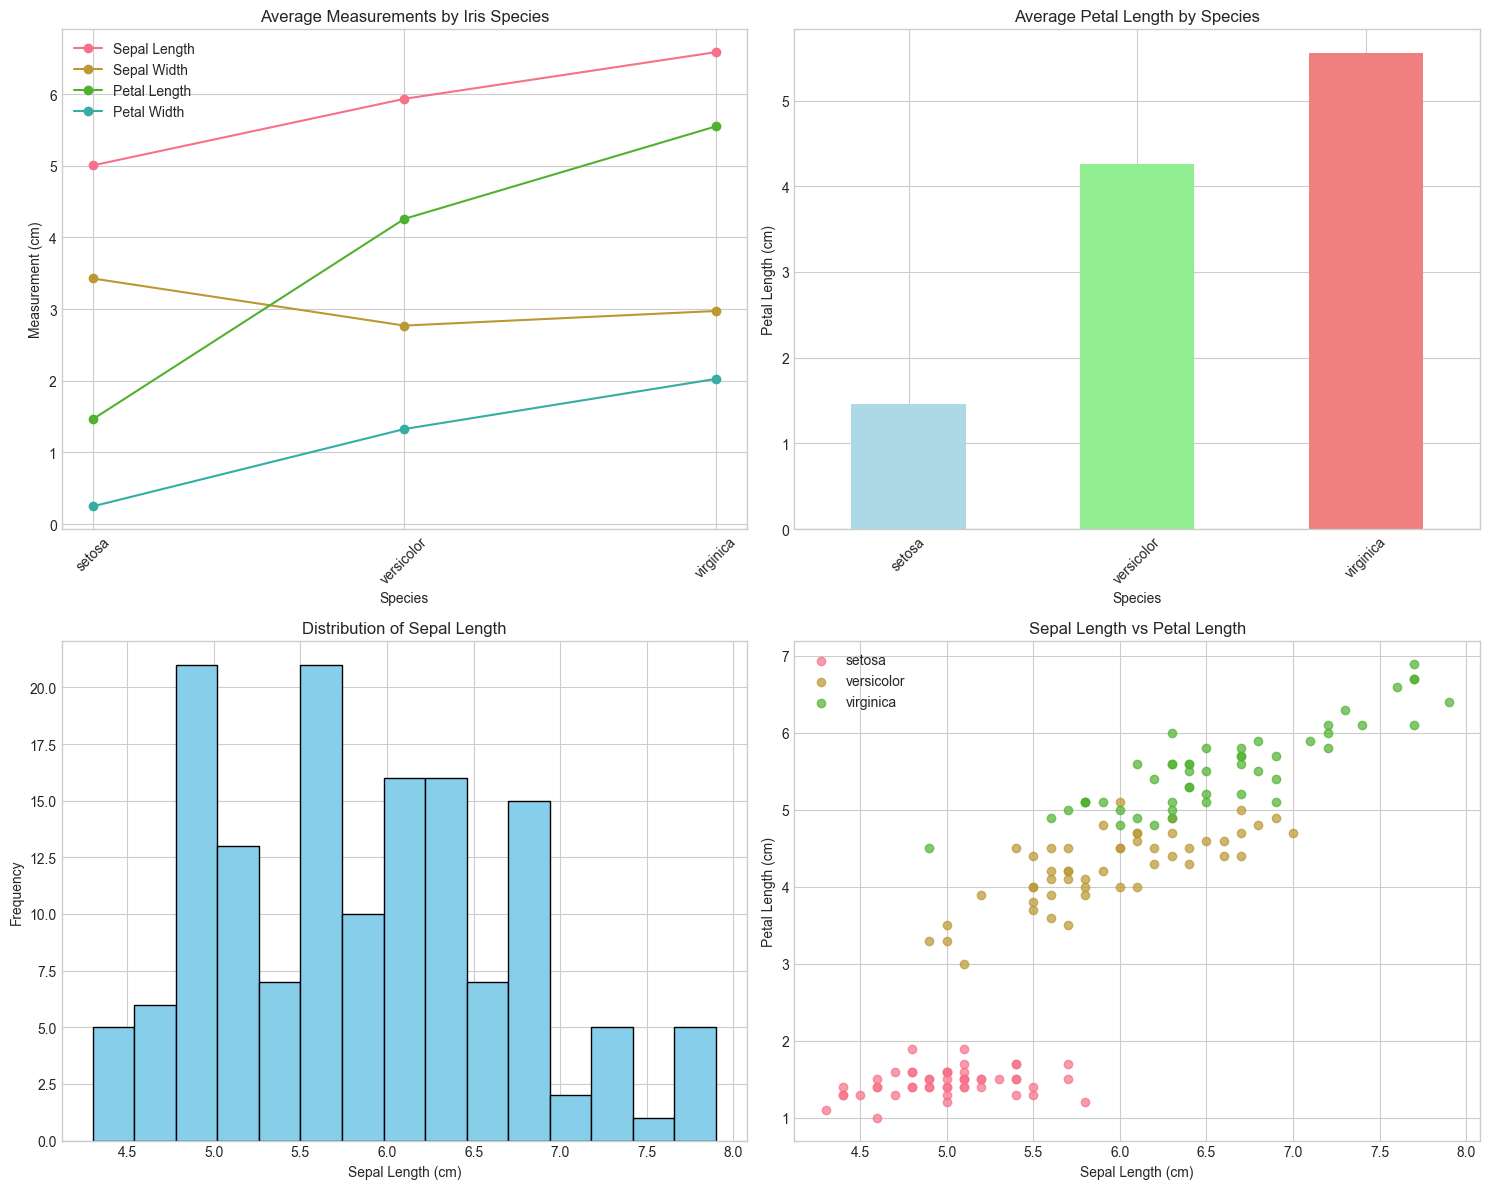

In [ ]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Line chart showing trends across species
species_means = iris_df.groupby('species').mean()
axes[0, 0].plot(species_means.index, species_means['sepal length (cm)'], marker='o', label='Sepal Length')
axes[0, 0].plot(species_means.index, species_means['sepal width (cm)'], marker='o', label='Sepal Width')
axes[0, 0].plot(species_means.index, species_means['petal length (cm)'], marker='o', label='Petal Length')
axes[0, 0].plot(species_means.index, species_means['petal width (cm)'], marker='o', label='Petal Width')
axes[0, 0].set_title('Average Measurements by Iris Species')
axes[0, 0].set_xlabel('Species')
axes[0, 0].set_ylabel('Measurement (cm)')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Bar chart showing comparison of average petal length per species
species_means['petal length (cm)'].plot(kind='bar', ax=axes[0, 1], color=['lightblue', 'lightgreen', 'lightcoral'])
axes[0, 1].set_title('Average Petal Length by Species')
axes[0, 1].set_xlabel('Species')
axes[0, 1].set_ylabel('Petal Length (cm)')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Histogram of sepal length to understand its distribution
axes[1, 0].hist(iris_df['sepal length (cm)'], bins=15, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Distribution of Sepal Length')
axes[1, 0].set_xlabel('Sepal Length (cm)')
axes[1, 0].set_ylabel('Frequency')

# 4. Scatter plot to visualize relationship between sepal length and petal length
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
for species in iris_df['species'].unique():
    species_data = iris_df[iris_df['species'] == species]
    axes[1, 1].scatter(species_data['sepal length (cm)'], species_data['petal length (cm)'], 
                       label=species, alpha=0.7)
axes[1, 1].set_title('Sepal Length vs Petal Length')
axes[1, 1].set_xlabel('Sepal Length (cm)')
axes[1, 1].set_ylabel('Petal Length (cm)')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('iris_visualizations.png')  # Save the figure
plt.show()

Correlation matrix:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


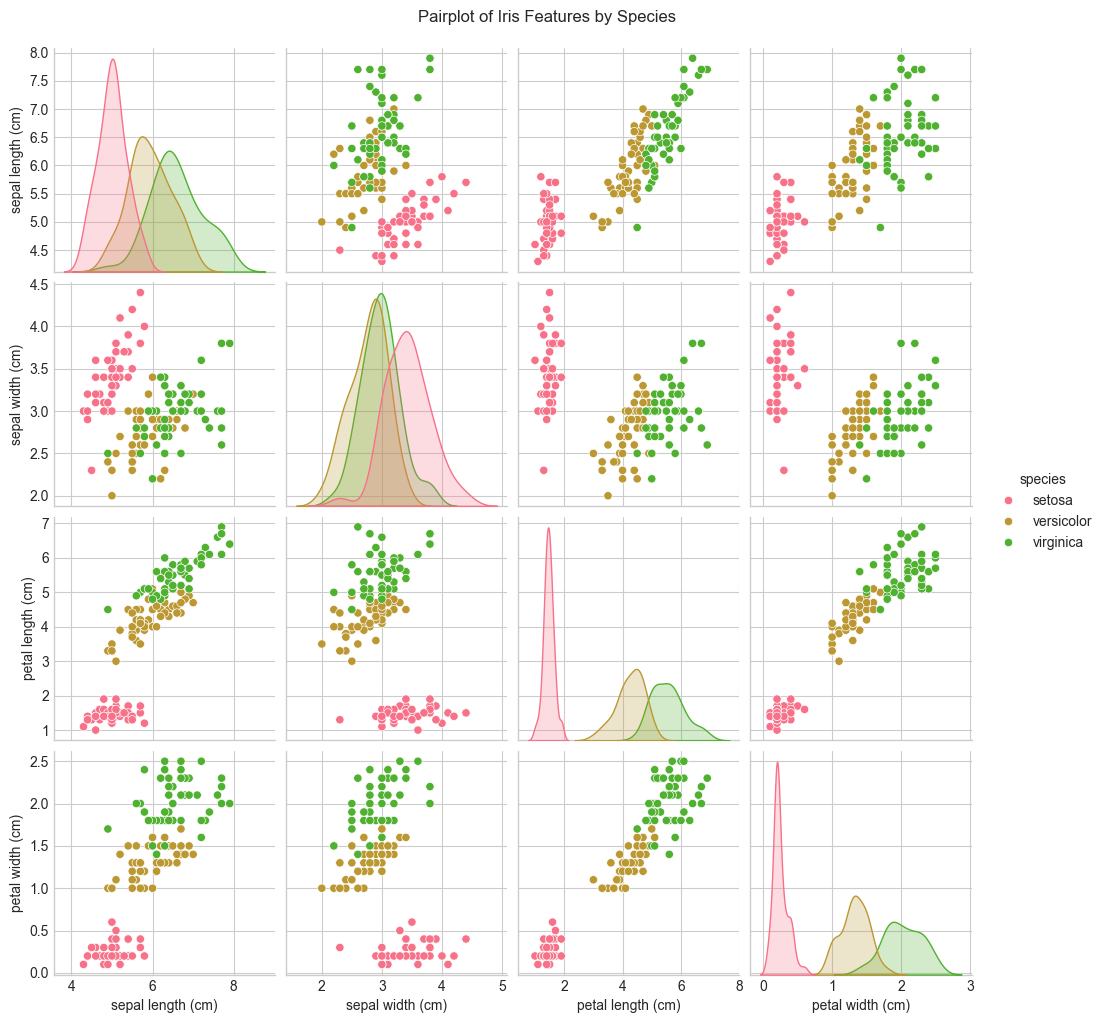

In [ ]:
# Correlation matrix
print("Correlation matrix:")
correlation_matrix = iris_df.iloc[:, :4].corr()
display(correlation_matrix)

# Pairplot for additional insights
sns.pairplot(iris_df, hue='species', height=2.5)
plt.suptitle('Pairplot of Iris Features by Species', y=1.02)
plt.savefig('iris_pairplot.png')
plt.show()

## Summary of Findings

1. **Dataset Structure**: The Iris dataset contains 150 samples with 4 numerical features and 1 categorical feature. There are no missing values.

2. **Species Differences**: 
   - Setosa flowers have the smallest measurements
   - Virginica flowers have the largest measurements
   - Versicolor flowers fall in between

3. **Correlations**: 
   - Strong positive correlation between petal length and petal width
   - Sepal length and petal length are also positively correlated

4. **Distributions**:
   - Sepal length follows a roughly normal distribution
   - Petal measurements show clear separation between species